In [56]:
import os 

os.listdir('data')

['average_quantity.csv', 'cohort_counts.csv', 'online.csv']

In [65]:
import pandas as pd 
import datetime as dt 


online = pd.read_csv('data/online.csv')
online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


# Cohort Analysis

- 코호트(Cohort): Mutually exclusive segments 
- 제품 라이프사이클 (Product Life Cycle)에 따른 지표(Metric) 분석
- 고객 라이프사이클 (Customer Life Cycle)에 따른 지표(Metric) 분석

- 코호트의 종류: Time Cohorts, Behavior Cohorts, Size Cohorts

- 코호트의 요소: 피봇 테이블, 행(Row)에 배정된 코호트 표시, 열(Column)에 코호트 인덱스 표시, 테이블에 지표(Metric) 표시

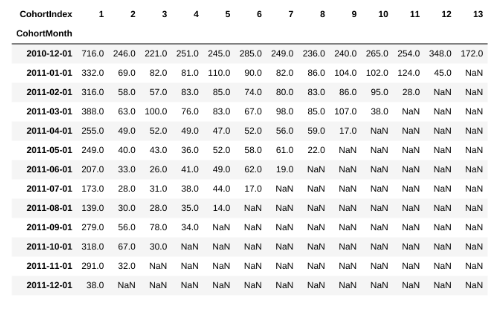

- 위의 피봇 테이블에서는, Cohort Month는 Acquisition이 일어난 달을, Cohort Index는 Acquisition으로부터 몇 달이 지났는지를 나타냄.

## Online 데이터셋 코호트 피봇 테이블 생성

CustomerID가 포함된 전체 거래수는 70864이지만, 고객의 고윳값 수는 3701개로 더 적음. 즉, 같은 고객이 여러 번 거래를 진행함. 
Cohort Month 를 구하기 위해서는, 1) CustomerID 별로 거래를 그룹핑하고, 2) 각 고객이 최초로 거래를 진행한 달(Acquisition Month)을 알아내야 함. 

In [58]:
print('전체 거래수:{}'.format(len(online['CustomerID'].values)))
print('고객 고윳값 수:{}'.format(online['CustomerID'].nunique()))

전체 거래수:70864
고객 고윳값 수:3701


In [59]:
online.groupby('CustomerID').count()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,,,,,,,,
12747,27,27,27,27,27,27,27,27
12748,967,967,967,967,967,967,967,967
12749,37,37,37,37,37,37,37,37
12820,17,17,17,17,17,17,17,17
12822,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...
18280,2,2,2,2,2,2,2,2
18281,2,2,2,2,2,2,2,2
18282,2,2,2,2,2,2,2,2


In [67]:
def get_month(x):
    # YYYY-MM-01 반환하는 함수
    return dt.datetime(x.year, x.month, 1)

online['InvoiceDate']= pd.to_datetime(online['InvoiceDate'])
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)
grouping = online.groupby('CustomerID')['InvoiceMonth']
online['CohortMonth'] = grouping.transform('min')

online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01


Cohort Index를 계산하기 위해, 송장 날짜와 고객의 Cohort Month (Month of Acquisition)의 차이를 계산함. 

In [68]:
def get_date_int(df, column):
    #데이터프레임에서 year, month, day의 정수(integer)형 값을 추출하는 함수 
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    
    return year, month, day

invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month 

online['Cohort_Index'] = years_diff * 12 + months_diff + 1
online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,Cohort_Index
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


In [81]:
grouping = online.groupby(['CohortMonth', 'Cohort_Index'])
# Cohort Month, Cohort Index로 그룹핑했을 때, Cohort Month와 Cohort Index 별 CustomerID 고윳값의 개수를 'CustomerID'의 value로 저장
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
#Cohort data를 피봇팅, 인덱스로는 Cohort Month가, 컬럼에는 Cohort Index가, 테이블 값으로는 CustomerID의 고윳값 개수 (고객의 수)
cohort_counts = cohort_data.pivot(index='CohortMonth', columns = 'Cohort_Index', values = 'CustomerID')

pd.DataFrame(cohort_counts)

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cohort Metrics - Retention Rate

In [90]:
# 피봇 테이블 1열 1행 값은 각 코호트의 전체 크기에 해당
cohort_sizes = cohort_counts.iloc[:,0]
# Cohort Index 별 고객의 수를 코호트 크기로 나누면 Retention Rate를 계산할 수 있음 
retention = cohort_counts.divide(cohort_sizes, axis=0)
# 비율 형태로 계산 
retention.round(3) * 100

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,34.4,30.9,35.1,34.2,39.8,34.8,33.0,33.5,37.0,35.5,48.6,24.0
2011-01-01,100.0,20.8,24.7,24.4,33.1,27.1,24.7,25.9,31.3,30.7,37.3,13.6,NaN
2011-02-01,100.0,18.4,18.0,26.3,26.9,23.4,25.3,26.3,27.2,30.1,8.9,NaN,NaN
2011-03-01,100.0,16.2,25.8,19.6,21.4,17.3,25.3,21.9,27.6,9.8,NaN,NaN,NaN
2011-04-01,100.0,19.2,20.4,19.2,18.4,20.4,22.0,23.1,6.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,16.1,17.3,14.5,20.9,23.3,24.5,8.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.9,12.6,19.8,23.7,30.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.2,17.9,22.0,25.4,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,21.6,20.1,25.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


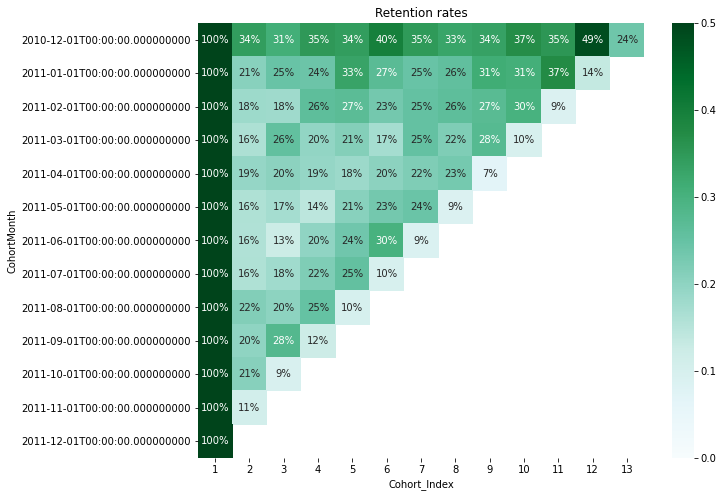

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.title('Retention rates')

sns.heatmap(data = retention, annot = True, fmt = '.0%', vmin = 0.0, vmax = 0.5, cmap = 'BuGn')
plt.show()

Y축에 더럽게 찍히는 타임스탬프는 어떻게 없애지...? 더 알아볼 것

## Cohort Metrics - Average Quantity 

In [92]:
grouping = online.groupby(['CohortMonth','Cohort_Index'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth', columns='Cohort_Index',values='Quantity')
average_quantity.round(1)

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.1,12.3,12.2,13.2,13.7,11.3,10.6,12.8,13.2,13.0,14.5,10.9,13.7
2011-01-01,10.9,10.8,10.0,10.1,14.3,13.2,17.4,16.4,18.7,10.2,10.7,13.2,NaN
2011-02-01,12.1,14.3,10.6,11.5,17.5,12.2,17.3,13.2,13.4,15.9,14.3,NaN,NaN
2011-03-01,9.6,14.2,13.0,10.2,16.1,12.7,11.6,11.5,9.0,9.6,NaN,NaN,NaN
2011-04-01,9.9,11.1,12.4,11.5,11.4,7.7,10.4,9.4,6.6,NaN,NaN,NaN,NaN
2011-05-01,14.1,9.6,15.3,11.6,11.9,8.5,9.8,7.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.6,16.1,18.1,11.2,12.4,7.2,9.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.9,16.4,5.6,10.1,6.2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.5,7.4,5.5,5.7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


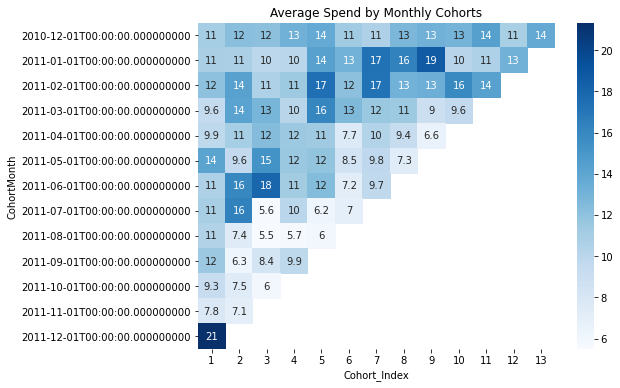

In [98]:
plt.figure(figsize=(8, 6))
plt.title('Average Spend by Monthly Cohorts')

sns.heatmap(average_quantity, annot=True, cmap='Blues')
plt.show()